# Getting Started

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data and dataset modification

In [4]:
DATA_FOLDER = "../../data/"

PREPROCESSED_CHARACTER_DATASET = DATA_FOLDER+"preprocessed_character_metadata2.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"

character_metadata = pd.read_csv(PREPROCESSED_CHARACTER_DATASET, sep='\t')
movies_column_names = ['Wikipedia_Movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date','Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']
movies = pd.read_csv(MOVIE_DATASET, sep='\t', header=None,names=movies_column_names, decimal='.' )

We want to look at the character ethnicity representation depending on the country. Therefore, we can merge the character dataset with the column from the movie dataset containing the country of each film.  

In [5]:
character_countries = pd.merge(character_metadata,movies[['Wikipedia_Movie_ID', 'Movie_countries']], on = 'Wikipedia_Movie_ID')
character_countries.sample(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Character_Name,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Ethnicity_Label,Movie_countries
6661,1496798,/m/055zb2,NaN,/m/041rx,Elliott Gould,61.0,/m/0cg42yx,NaN,/m/02xwgr,2000.0,"['European', 'Jewish', 'Asian', 'Russian', 'Ea...","{""/m/09c7w0"": ""United States of America"", ""/m/..."
570,2887314,/m/0897y1,NaN,/m/041rx,John Houseman,79.0,/m/0jyrx3,NaN,/m/01vsps,1981.0,"['European', 'Jewish', 'Western European', 'Br...","{""/m/09c7w0"": ""United States of America""}"
5491,8212456,/m/026wc9d,NaN,/m/07hwkr,Susan Lucci,35.0,/m/0gz6r1v,NaN,/m/02_2sn,1982.0,"['European', 'Scandinavian', 'Swedish']","{""/m/09c7w0"": ""United States of America""}"
2525,1821202,/m/05zlgl,Patrician in Arena,/m/02ctzb,Sharon Tate,19.0,/m/05m2j5t,/m/0h0wdqs,/m/0c5qr,1962.0,"['European', 'Western European', 'Swiss', 'Cen...","{""/m/03rjj"": ""Italy""}"
2602,26518860,/m/0bh7bpg,NaN,/m/065b6q,Crispin Glover,45.0,/m/0cv475c,NaN,/m/023n39,2010.0,"['European', 'Scandinavian', 'Czech', 'Swedish...","{""/m/06mkj"": ""Spain"", ""/m/07ssc"": ""United King..."


## Actor ethnicity in the US vs Rest of the world

We want to analyze the impact of 9/11 on the actor ethnicty within each film. In this purpose we will analyze the actor ethnicity changement befrore and after 9/11. Moreover, we expect for 9/11 to have a higher impact in the US compared to the rest of the world. Therefore, we will compare the data on those levels.

In [6]:
ethnicities_csv = pd.read_csv(DATA_FOLDER+"americans_by_descent.csv")
list_ethnicities = ethnicities_csv.columns[2:]

character = character_countries.copy()
print("length of the dataset: ", len(character))

#Separation into 2 datasets, one with only movies form the US and the other that contaisn all the other movies

character_ROW = character.loc[~character['Movie_countries'].str.contains("United States of America")]
print("length of the ROW dataset: ", len(character_ROW))

character_US = character.loc[character['Movie_countries'].str.contains("United States of America")]
print("length of the US dataset: ", len(character_US))

#reset the index

character_ROW = character_ROW.reset_index(drop = True)
character_US = character_US.reset_index(drop = True)

length of the dataset:  18567
length of the ROW dataset:  1530
length of the US dataset:  17037


We count the occurence of each ethnicity in both datasets

In [7]:
distribution_ROW = []
distribution_US = []

for eth in list_ethnicities:
    count = character_ROW['Ethnicity_Label'].apply(lambda x: 1 if eth in x else 0).sum()
    distribution_ROW.append(count)
    count = character_US['Ethnicity_Label'].apply(lambda x: 1 if eth in x else 0).sum()
    distribution_US.append(count)

In [8]:
ethnicities_dict = {
    'Ethnicity' : list_ethnicities,
    'Rest of the World' : distribution_ROW,
    'United States' : distribution_US
}

ethnicities_distribution = pd.DataFrame(ethnicities_dict)
ethnicities_distribution.head()

,Ethnicity,Rest of the World,United States
0,African,60,1102
1,Arab,38,529
2,Caribbean,57,844
3,European,1179,13730
4,Greenlandic,0,0


In [9]:
sorted_ROW = ethnicities_distribution.sort_values(by='Rest of the World', ascending=False).head(10)
ethnicity_top10_ROW = sorted_ROW['Ethnicity'].head(10)
sorted_US = ethnicities_distribution.sort_values(by='United States', ascending=False).head(10)
ethnicity_top10_US = sorted_US['Ethnicity'].head(10)

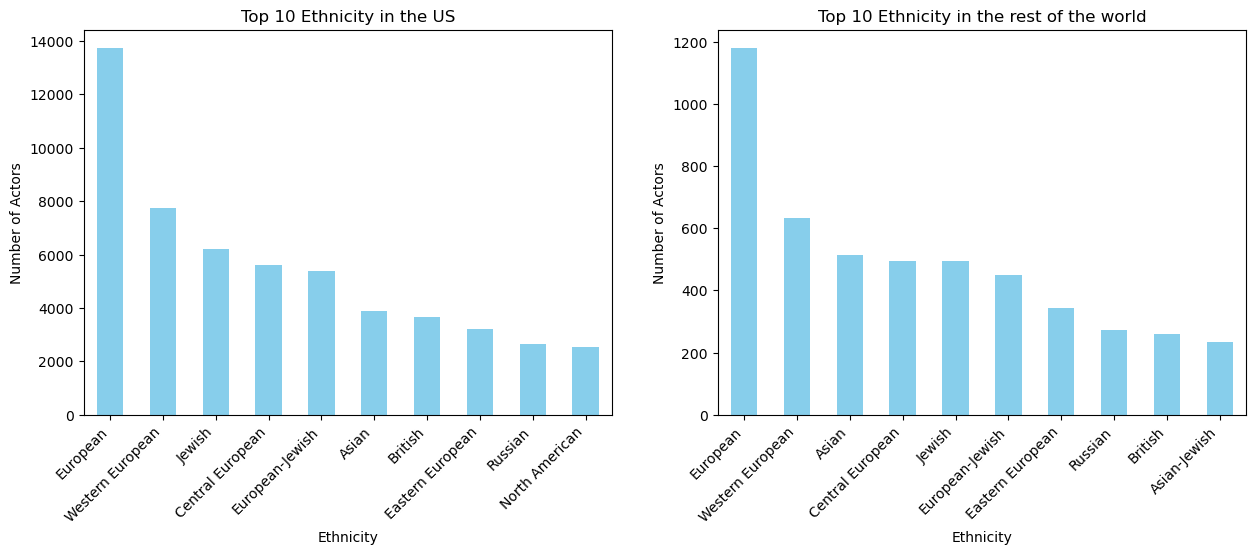

In [10]:
sorted_ROW = ethnicities_distribution.sort_values(by='Rest of the World', ascending=False).head(10)
sorted_US = ethnicities_distribution.sort_values(by='United States', ascending=False).head(10)

ethnicity_top10_ROW = sorted_ROW.set_index('Ethnicity')['Rest of the World']
ethnicity_top10_US = sorted_US.set_index('Ethnicity')['United States']

# Plot the distribution of each ethnicity
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ethnicity_top10_US.plot(kind='bar', color='skyblue')
plt.title("Top 10 Ethnicity in the US")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ethnicity_top10_ROW.plot(kind='bar', color='skyblue')
plt.title("Top 10 Ethnicity in the rest of the world")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')
# plt.subplots_adjust(wspace=0.5)
plt.show()


For more flexibility and tightness, we can use an interactive plot for our analysis.

In [11]:
from ipywidgets import interact, widgets

def update_plot(top_n= 10, region='United States'):

    sorted_data = ethnicities_distribution.sort_values(by= region, ascending=False).head(top_n)
    top_ethnicities = sorted_data.set_index('Ethnicity')[region]

    plt.figure(figsize=(14, 8))
    top_ethnicities.plot(kind='bar', color='skyblue')
    plt.title(f"Top {top_n} Ethnicities in the {region}")
    plt.xlabel("Ethnicity")
    plt.ylabel("Number of Actors")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Create interactive widgets
interact(
    update_plot,
    top_n=widgets.IntSlider(min=5, max=50, step=1, value=10, description='Top N'),
    region=widgets.RadioButtons(
        options=['United States', 'Rest of the World'],
        value='United States',
        description='Region'
    )
)


interactive(children=(IntSlider(value=10, description='Top N', max=50, min=5), RadioButtons(description='Regio…

<function __main__.update_plot(top_n=10, region='United States')>

We observe the top 10 ethnicty in the rest of the world differ from the top 10 ethnicty within the US. The African Americains is the most represented ethnicity in the US whereas in the rest of the world this is the indian. 

For conveniance, we will create a function that returns the 10 most represented ethnicities given a dataframe, using the same method as shown above.

In [12]:
def extract_top_10(df):

    ethnicities_csv = pd.read_csv(DATA_FOLDER+"americans_by_descent.csv")
    list_ethnicities = ethnicities_csv.columns[2:]

    distribution = []

    for eth in list_ethnicities:
        count = df['Ethnicity_Label'].apply(lambda x: 1 if eth in x else 0).sum()
        distribution.append(count)

    ethnicities_dict = {
        'Ethnicity' : list_ethnicities,
        'Occurences' : distribution
    }

    ethnicities_distribution = pd.DataFrame(ethnicities_dict)
    sorted_df = ethnicities_distribution.sort_values(by='Occurences', ascending=False).head(10)
    ethnicity_top10 = sorted_df['Ethnicity'].head(10)

    return ethnicities_distribution, ethnicity_top10 # returns a pandas Series

### The impact of 9/11

We will now deep into a reduce period of time, between 1993 and 2010 and observe the difference between ethnicities representation in the US compared to the rest of the world. 

In [13]:
# First for the US movies, we will filter the data for movies released between 1993 and 2001 and between 2002 and 2010,
# and study the most common ethnicities for these time periods.

#  Filter data for based on release year
data_1993_2001_US = character_US[(character_US['Movie_Release_Year'] >= 1993) & 
                                    (character_US['Movie_Release_Year'] <= 2001)]
data_2002_2010_US = character_US[(character_US['Movie_Release_Year'] >= 2002) & 
                                    (character_US['Movie_Release_Year'] <= 2010)]
data_1993_2010_US = character_US[(character_US['Movie_Release_Year'] >= 1993) &
                                    (character_US['Movie_Release_Year'] <= 2010)]

# Count the top 10 ethnicities overall
ethnicities_distribution_US, top_ethnicities_US = extract_top_10(data_1993_2010_US)

# Extract the ethnicity distribution for each time period
distribution_1993_2001_US, _ = extract_top_10(data_1993_2001_US)
distribution_2002_2010_US, _ = extract_top_10(data_2002_2010_US)

# Occurrences for the top 10 ethnicities in each time period
ethnicity_counts_1993_2001_US = distribution_1993_2001_US[distribution_1993_2001_US['Ethnicity'].isin(top_ethnicities_US)]
ethnicity_counts_2002_2010_US = distribution_2002_2010_US[distribution_2002_2010_US['Ethnicity'].isin(top_ethnicities_US)]

We apply the same procedure for the rest of the world

In [14]:
#  Filter data for based on release year
data_1993_2001_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 1993) & 
                                    (character_ROW['Movie_Release_Year'] <= 2001)]
data_2002_2010_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 2002) &
                                    (character_ROW['Movie_Release_Year'] <= 2010)]
data_1993_2010_ROW = character_ROW[(character_ROW['Movie_Release_Year'] >= 1993) &
                                    (character_ROW['Movie_Release_Year'] <= 2010)]

# Count the top 10 ethnicities overall
ethnicities_distribution_ROW, top_ethnicities_ROW = extract_top_10(data_1993_2010_ROW)

# Extract the ethnicity distribution for each time period
distribution_1993_2001_ROW, _ = extract_top_10(data_1993_2001_ROW)
distribution_2002_2010_ROW, _ = extract_top_10(data_2002_2010_ROW)

# Count occurrences for each ethnicity in each time period
ethnicity_counts_1993_2001_ROW = distribution_1993_2001_ROW[distribution_1993_2001_ROW['Ethnicity'].isin(top_ethnicities_ROW)]
ethnicity_counts_2002_2010_ROW = distribution_2002_2010_ROW[distribution_2002_2010_ROW['Ethnicity'].isin(top_ethnicities_ROW)]

We can now plot the proportion of actor among the 10 most represented ethnicities, for the US and the rest of the world, and compare to see whether there is a different distribution in the two time periods.

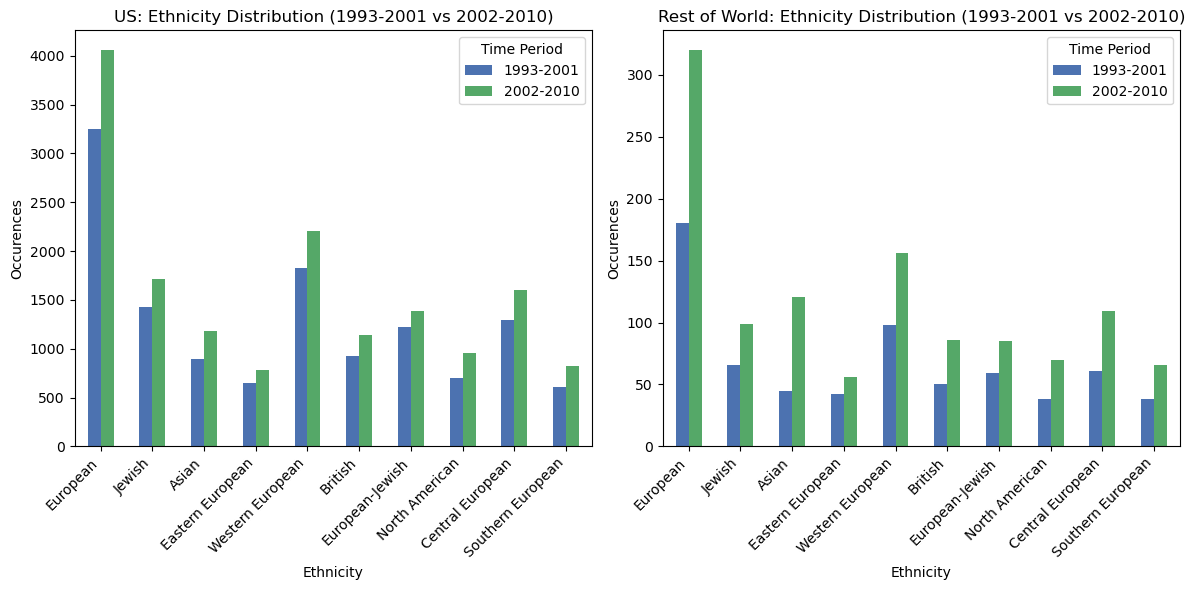

In [15]:
# Convert ethnicity counts to DataFrames for easier plotting
df_US = pd.DataFrame({
    'Ethnicity': ethnicity_counts_1993_2001_US['Ethnicity'],
    '1993-2001': ethnicity_counts_1993_2001_US['Occurences'],
    '2002-2010': ethnicity_counts_2002_2010_US['Occurences']
})

df_ROW = pd.DataFrame({
    'Ethnicity': ethnicity_counts_1993_2001_ROW['Ethnicity'],
    '1993-2001': ethnicity_counts_1993_2001_ROW['Occurences'],
    '2002-2010': ethnicity_counts_2002_2010_ROW['Occurences']
})

# Set up the plotting style
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for US
df_US.set_index('Ethnicity').plot(
    kind='bar', ax=axes[0], color=['#4c72b0', '#55a868']
)
axes[0].set_title('US: Ethnicity Distribution (1993-2001 vs 2002-2010)')
axes[0].set_ylabel('Occurences')
axes[0].set_xlabel('Ethnicity')
axes[0].legend(title="Time Period")
axes[0].set_xticklabels(df_US['Ethnicity'], rotation=45, ha="right")

# Plot for Rest of World
df_ROW.set_index('Ethnicity').plot(
    kind='bar', ax=axes[1], color=['#4c72b0', '#55a868']
)
axes[1].set_title('Rest of World: Ethnicity Distribution (1993-2001 vs 2002-2010)')
axes[1].set_ylabel('Occurences')
axes[1].set_xlabel('Ethnicity')
axes[1].legend(title="Time Period")
axes[1].set_xticklabels(df_ROW['Ethnicity'], rotation=45, ha="right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


We now repeat the exact same procedure, but we use proportions instead of absolute occurences. We must do this because we want to work with relative values. There are more movies (and hence more actors) in total in the time period 2002-2010 than in 1993-2001, and we don't want this to influence our analysis on ethnicities.

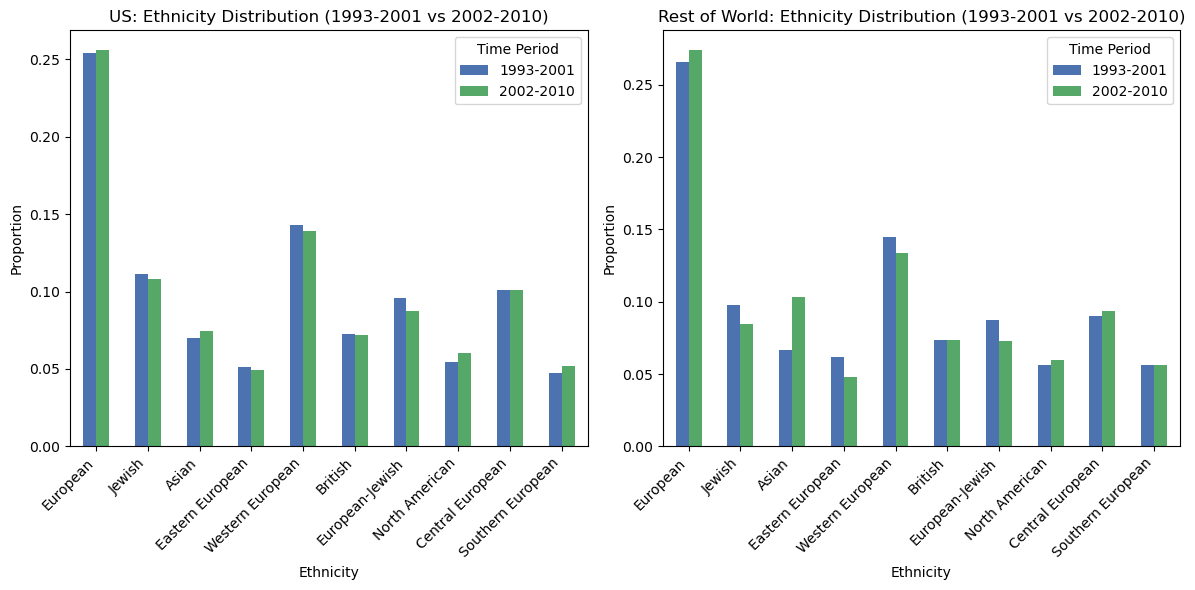

In [16]:
df_US_percentage = pd.DataFrame({
    'Ethnicity': ethnicity_counts_1993_2001_US['Ethnicity'],
    '1993-2001': ethnicity_counts_1993_2001_US['Occurences']/ethnicity_counts_1993_2001_US['Occurences'].sum(),
    '2002-2010': ethnicity_counts_2002_2010_US['Occurences']/ethnicity_counts_2002_2010_US['Occurences'].sum()
})

df_ROW_percentage = pd.DataFrame({
    'Ethnicity': ethnicity_counts_1993_2001_ROW['Ethnicity'],
    '1993-2001': ethnicity_counts_1993_2001_ROW['Occurences']/ethnicity_counts_1993_2001_ROW['Occurences'].sum(),
    '2002-2010': ethnicity_counts_2002_2010_ROW['Occurences']/ethnicity_counts_2002_2010_ROW['Occurences'].sum()
})

# Set up the plotting style
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for US
df_US_percentage.set_index('Ethnicity').plot(
    kind='bar', ax=axes[0], color=['#4c72b0', '#55a868']
)
axes[0].set_title('US: Ethnicity Distribution (1993-2001 vs 2002-2010)')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Ethnicity')
axes[0].legend(title="Time Period")
axes[0].set_xticklabels(df_US_percentage['Ethnicity'], rotation=45, ha="right")

# Plot for Rest of World
df_ROW_percentage.set_index('Ethnicity').plot(
    kind='bar', ax=axes[1], color=['#4c72b0', '#55a868']
)
axes[1].set_title('Rest of World: Ethnicity Distribution (1993-2001 vs 2002-2010)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Ethnicity')
axes[1].legend(title="Time Period")
axes[1].set_xticklabels(df_ROW_percentage['Ethnicity'], rotation=45, ha="right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import interact, IntSlider, Dropdown
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sorted_ethnicities_US = ethnicities_distribution_US.sort_values(by='Occurences', ascending=False)
sorted_ethnicities_ROW = ethnicities_distribution_ROW.sort_values(by='Occurences', ascending=False)

df_US_ = pd.DataFrame({
    'Ethnicity': distribution_1993_2001_US['Ethnicity'],
    '1993-2001': distribution_1993_2001_US['Occurences'],
    '2002-2010': distribution_2002_2010_US['Occurences']
})

df_US_percentage_ = pd.DataFrame({
    'Ethnicity': distribution_1993_2001_US['Ethnicity'],
    '1993-2001': distribution_1993_2001_US['Occurences']/distribution_1993_2001_US['Occurences'].sum(),
    '2002-2010': distribution_2002_2010_US['Occurences']/distribution_2002_2010_US['Occurences'].sum()
})

df_ROW_ = pd.DataFrame({
    'Ethnicity': distribution_1993_2001_ROW['Ethnicity'],
    '1993-2001': distribution_1993_2001_ROW['Occurences'],
    '2002-2010': distribution_2002_2010_ROW['Occurences']
})

df_ROW_percentage_ = pd.DataFrame({
    'Ethnicity': distribution_1993_2001_ROW['Ethnicity'],
    '1993-2001': distribution_1993_2001_ROW['Occurences']/distribution_1993_2001_ROW['Occurences'].sum(),
    '2002-2010': distribution_2002_2010_ROW['Occurences']/distribution_2002_2010_ROW['Occurences'].sum()
})

def update_plot(top_n, location, method):
    if location == 'US':
        top_ethnicities = sorted_ethnicities_US.head(top_n)['Ethnicity']
        data = df_US_percentage_ if method == 'Proportion' else df_US_
    else:
        top_ethnicities = sorted_ethnicities_ROW.head(top_n)['Ethnicity']
        data = df_ROW_percentage_ if method == 'Proportion' else df_ROW_

    # Filter data to include only the top N ethnicities
    filtered_data = data[data['Ethnicity'].isin(top_ethnicities)].copy()

    # Ensure Ethnicity is ordered based on top_ethnicities
    filtered_data['Ethnicity'] = pd.Categorical(
        filtered_data['Ethnicity'], categories=top_ethnicities, ordered=True
    )
    filtered_data = filtered_data.sort_values(by='Ethnicity')

    # Create figure
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Bar(
        x=filtered_data['Ethnicity'],
        y=filtered_data['1993-2001'],
        name='1993-2001',
        marker_color='#4c72b0'
    ))
    fig.add_trace(go.Bar(
        x=filtered_data['Ethnicity'],
        y=filtered_data['2002-2010'],
        name='2002-2010',
        marker_color='#55a868'
    ))

    # Update layout
    fig.update_layout(
        title=f"{location}: Ethnicity Distribution ({method})",
        xaxis_title="Ethnicity",
        yaxis_title="Proportion" if method == 'Proportion' else "Number of actors",
        barmode='group',
        xaxis_tickangle=-45,
        height=600
    )
    return fig

def interactive_plot(top_n, location, method, updatePlot = 0):

    dumb_variable = 0

    fig = update_plot(top_n, location, method)

    if updatePlot != 0:
        fig.show()
        dumb_variable = 1

    if updatePlot == 0: # remove the plot from the output
        # plot an empty figure
        fig = go.Figure()
        if dumb_variable != 0:
            fig.show()
        


# Use interact with the updated interactive function
interact(
    interactive_plot,
    top_n=IntSlider(min=1, max=30, step=1, value=10, description='Top Ethnicities'),
    location=Dropdown(options=['US', 'Rest of the world'], value='US', description='Location'),
    method=Dropdown(options=['Number of actors', 'Proportion'], value='Number of actors', description='Method')
)


interactive(children=(IntSlider(value=10, description='Top Ethnicities', max=30, min=1), Dropdown(description=…

<function __main__.interactive_plot(top_n, location, method, updatePlot=0)>

We observe there is no major changes in the top 10 actor ethnciites representation in the movies between 1993 and 2010 neither in the rest of the world or the United States.

Finally, we want to isolate the actor ethnicities that exhibit major changes before and after 9/11. Therefore, we will look at the top 10  actor ethnicites that exxhibit larger relative changes ratio. 

In [18]:
# We compute the relative changes for each ethnicites between 1991-2001 and 2002-2011

# Define a new column for the variation (in %)
df_US['Ratio'] = -(df_US['1993-2001'] - df_US['2002-2010']) / (df_US['1993-2001'])
df_ROW['Ratio'] = -(df_ROW['1993-2001'] - df_ROW['2002-2010']) / (df_ROW['1993-2001'])

# Sort by the ratio to find the largest 
largest_ratios_US = df_US.sort_values(by='Ratio', ascending=False).head(5)
largest_ratios_ROW = df_ROW.sort_values(by='Ratio', ascending=False).head(5)

print("US: 5 Largest Ratios: \n \n", largest_ratios_US)
print("\n \n Rest of the world: 5 Largest Ratios:\n \n", largest_ratios_ROW)

US: 5 Largest Ratios: 
 
              Ethnicity  1993-2001  2002-2010     Ratio
288     North American        699        952  0.361946
404  Southern European        608        823  0.353618
69               Asian        893       1184  0.325868
3             European       3249       4058  0.249000
403   Central European       1294       1605  0.240340

 
 Rest of the world: 5 Largest Ratios:
 
              Ethnicity  1993-2001  2002-2010     Ratio
69               Asian         45        121  1.688889
288     North American         38         70  0.842105
403   Central European         61        109  0.786885
3             European        180        320  0.777778
404  Southern European         38         66  0.736842


We observe ratios larger than 1 meaning they exhibit significant differences between the 2 observed periods, i.e before and after 9/11. From this first analysis, we do not observe any tendency of impact of 9/11 on racism. 